# 2D ring resonator

This is a simple example of using Tidy3D to perform a 2D simulation of a ring resonator side coupled to a dielectric waveguide.

<img src="img/ring.png" alt="diagram" width="300"/>

With a center wavelength of 500 nm and 10 nm resolution, this is a challenging FDTD problem because of the large simulation size.  The simulation contains 1 million grid points to model the entire domain and 290,000 time steps to capture the resonance of the ring.

With Tidy3D, we perform each simulation in just a few minutes.

In [1]:
# standard python imports
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

# tidy3D import
import tidy3d.web as web
import tidy3d as td

## Initial setup

Our ring resonator will include a ring centered at (0,0) with a waveguide just above the ring spanning the x direction.

```    
                      (waveguide)      
                in -> ========== -> out
                           0
                      (resonator)
   ```

In [2]:
# resolution
dl = 0.01

# define geometry
wg_width = 0.25
couple_width = 0.05
ring_radius = 3.5
ring_wg_width = 0.25
wg_spacing = 2.0
buffer = 2.0

# compute quantities based on geometry parameters
x_span = 2*wg_spacing + 2*ring_radius + 2*buffer
y_span = 2*ring_radius + 2*ring_wg_width + wg_width + couple_width + 2*buffer
wg_insert_x = ring_radius + wg_spacing
wg_center_y = ring_radius + ring_wg_width/2. + couple_width + wg_width/2.

# set number of PMLs on each side
npml = 15

In [3]:
# define pulse parameters
lambda0 = 1.0
freq0 = td.C_0 /lambda0
fwidth =  freq0 / 6
grids_per_wavelength = lambda0 / dl
run_time_norm = 1e-13  # run time for normalization run without ring
run_time = 5e-12       # run time for simulation with ring

Define materials. [(docs)](https://simulation.cloud/docs/html/api.html#material)

In [4]:
n_bg = 1.0
n_solid = 1.5
background = td.Medium(permittivity=n_bg**2)
solid = td.Medium(permittivity=n_solid**2)

Define structures. [(docs)](https://simulation.cloud/docs/html/api.html#structure)


In [5]:
# background of entire domain (set explicitly as a box)
background_box = td.Structure(
    geometry=td.Box(
        center=[0, 0, 0],
        size=[td.inf, td.inf, td.inf],
    ),
    medium=background,
    name='background')

# waveguide
waveguide = td.Structure(
    geometry=td.Box(
        center=[0, wg_center_y, 0],
        size=[td.inf, wg_width, td.inf],
    ),
    medium=solid,
    name='waveguide')

# outside ring
outer_ring = td.Structure(
    geometry=td.Cylinder(
        center=[0,0,0],
        axis=2,
        radius=ring_radius+ring_wg_width/2.0,
        length=td.inf,
    ),
    medium=solid,
    name='outer_ring')

# inside ring fill
inner_ring = td.Structure(
    geometry=td.Cylinder(
        center=[0,0,0],
        axis=2,
        radius=ring_radius-ring_wg_width/2.0,
        length=td.inf,
    ),
    medium=background,
    name='inner_ring')

In [6]:
from tidy3d.plugins import ModeSolver

mode_plane = td.Box(
    center=[-wg_insert_x, wg_center_y, 0],
    size=[0, 2, td.inf],
)

sim_modesolver = td.Simulation(
    size=[x_span, y_span, 1*dl],
    grid_size=[dl, dl, dl],
    structures=[background_box, waveguide],
)

mode_solver = ModeSolver(simulation=sim_modesolver, plane=mode_plane, freq=freq0)
mode_data_0 = mode_solver.solve(mode=td.Mode(mode_index=0))
mode_data_1 = mode_solver.solve(mode=td.Mode(mode_index=1))

mode_data_0.field_data['Ey']

<xarray.Tidy3dDataArray (x: 1, y: 201, z: 1, f: 1)>
array([[[[ 4.48437326e-15+1.66919785e-15j]],

 [[ 4.99016370e-15+1.75391782e-15j]],

 [[ 5.06707308e-15+1.86427570e-15j]],

 [[ 3.90625037e-15+8.25826657e-16j]],

 [[ 2.66094279e-15-7.10526685e-16j]],

 [[ 2.91627428e-15-5.73615506e-16j]],

 [[ 1.88268976e-15-1.63570999e-15j]],

 [[ 1.38219436e-15-8.45795635e-16j]],

 [[-3.75820337e-16-1.94088239e-15j]],

 [[-4.48412808e-16-1.81427282e-15j]],

...

 [[ 2.27756542e-15+3.74547078e-17j]],

 [[ 2.20952071e-15-1.55998535e-15j]],

 [[ 2.26564574e-15-9.60488937e-16j]],

 [[ 1.29611416e-15-9.76889497e-16j]],

 [[ 1.47247661e-15-4.22052733e-17j]],

 [[ 1.17241478e-15+1.71842979e-16j]],

 [[ 2.07263480e-15-7.22754241e-17j]],

 [[ 2.64047293e-15+1.81163731e-16j]],

 [[ 2.94773666e-15+9.50086393e-16j]],

 [[ 2.11153101e-15+1.55872541e-15j]]]])
Coordinates:
 * x (x) float64 -5.5
 * y (y) float64 2.795 2.805 2.815 2.825 ... 4.765 4.775 4.785 4.795
 * z (z) float64 -0.005
 * f (f) float64 2.998e+14 xarray.Tidy3dDataArray x : 1 y : 201 z : 1 f : 1 (4.484373256482703e-15+1.6691978457377597e-15j) ... (2.111531014866... array([[[[ 4.48437326e-15+1.66919785e-15j]],

 [[ 4.99016370e-15+1.75391782e-15j]],

 [[ 5.06707308e-15+1.86427570e-15j]],

 [[ 3.90625037e-15+8.25826657e-16j]],

 [[ 2.66094279e-15-7.10526685e-16j]],

 [[ 2.91627428e-15-5.73615506e-16j]],

 [[ 1.88268976e-15-1.63570999e-15j]],

 [[ 1.38219436e-15-8.45795635e-16j]],

 [[-3.75820337e-16-1.94088239e-15j]],

 [[-4.48412808e-16-1.81427282e-15j]],

...

 [[ 2.27756542e-15+3.74547078e-17j]],

 [[ 2.20952071e-15-1.55998535e-15j]],

 [[ 2.26564574e-15-9.60488937e-16j]],

 [[ 1.29611416e-15-9.76889497e-16j]],

 [[ 1.47247661e-15-4.22052733e-17j]],

 [[ 1.17241478e-15+1.71842979e-16j]],

 [[ 2.07263480e-15-7.22754241e-17j]],

 [[ 2.64047293e-15+1.81163731e-16j]],

 [[ 2.94773666e-15+9.50086393e-16j]],

 [[ 2.11153101e-15+1.55872541e-15j]]]]) Coordinates: (4) x (x) float64 -5.5 units : um long_name : x position array([-5.5]) y (y) float64 2.795 2.805 2.815 ... 4.785 4.795 units : um long_name : y position array([2.795, 2.805, 2.815, ..., 4.775, 4.785, 4.795]) z (z) float64 -0.005 units : um long_name : z position array([-0.005]) f (f) float64 2.998e+14 units : Hz long_name : frequency array([2.997925e+14]) Attributes: (0)

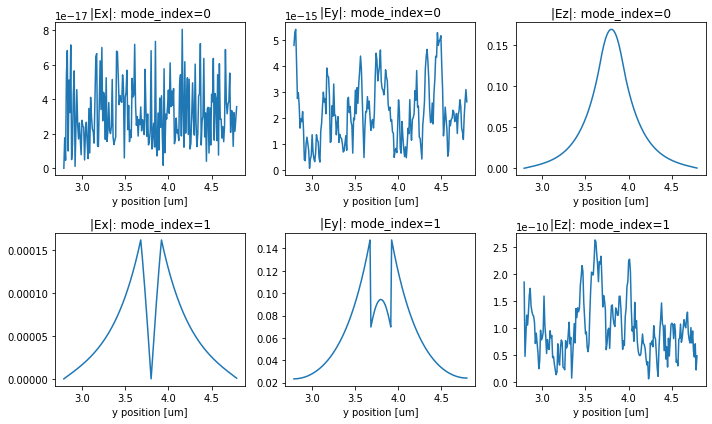

In [7]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, tight_layout=True, figsize=(10, 6))
abs(mode_data_0.field_data['Ex']).plot(ax=ax1)
abs(mode_data_0.field_data['Ey']).plot(ax=ax2)
abs(mode_data_0.field_data['Ez']).plot(ax=ax3)
abs(mode_data_1.field_data['Ex']).plot(ax=ax4)
abs(mode_data_1.field_data['Ey']).plot(ax=ax5)
abs(mode_data_1.field_data['Ez']).plot(ax=ax6)
ax1.set_title('|Ex|: mode_index=0')
ax2.set_title('|Ey|: mode_index=0')
ax3.set_title('|Ez|: mode_index=0')
ax4.set_title('|Ex|: mode_index=1')
ax5.set_title('|Ey|: mode_index=1')
ax6.set_title('|Ez|: mode_index=1')
plt.show()

From the above plots, we see that 

`mode_index=0` corresponds to exciting 0-th order TM mode (E=Ez) and 

`mode_index=1` corresponds to exciting 0-th order TE mode (E=Ey).

We can therefore switch the mode index accordingly based on our polarization.

Let's select Ey and create the source for it.

In [8]:
mode_source = mode_solver.to_source(mode=td.Mode(mode_index=1), fwidth=fwidth, direction="+")

In addition, let's monitor both the fields in plane as well as the output mode amplitudes into the fundamental TE mode.

In [9]:
# monitor steady state fields at central frequency over whole domain
field_monitor = td.FieldMonitor(
    center=[0, 0, 0],
    size=[td.inf, td.inf, 0],
    freqs=[freq0],
    name='field')

# monitor the mode amps on the output waveguide
lambdas_measure = np.linspace(0.8, 1.1, 1001)
freqs_measure = td.C_0 / lambdas_measure
mode_monitor = mode_solver.to_monitor(mode=td.Mode(mode_index=1), freqs=freqs_measure, name='mode')

# lets reset the center to the on the right hand side of the simulation though
mode_monitor.center = [+wg_insert_x, wg_center_y, 0]

Define simulation. [(docs)](https://simulation.cloud/docs/html/api.html#simulation)

Here, we turn off the automatic shutoff factor by setting it to 0. This is because we will compute the spectrum by a fourier transform of the time response, and we would like to run the normalization simulation and the simulation with ring to exactly the same `run_time`.

In [10]:
# create normalization simulation (no ring)
sim0 = td.Simulation(
    size=[x_span, y_span, 1*dl],
    grid_size=[dl, dl, dl],
    structures=[background_box, waveguide],
    sources=[mode_source],
    monitors=[field_monitor, mode_monitor],
    run_time = run_time_norm,
    pml_layers=[td.PML(), td.PML(), None])

# create simulation (with ring)
sim = td.Simulation(
    size=[x_span, y_span, 1*dl],
    grid_size=[dl, dl, dl],
    structures=[background_box, waveguide, outer_ring, inner_ring],
    sources=[mode_source],
    monitors=[field_monitor, mode_monitor],
    run_time = run_time,
    pml_layers=[td.PML(), td.PML(), None])

----
Visualize structure, source, and modes. [(docs)](https://simulation.cloud/docs/html/api.html#plotting-tools)

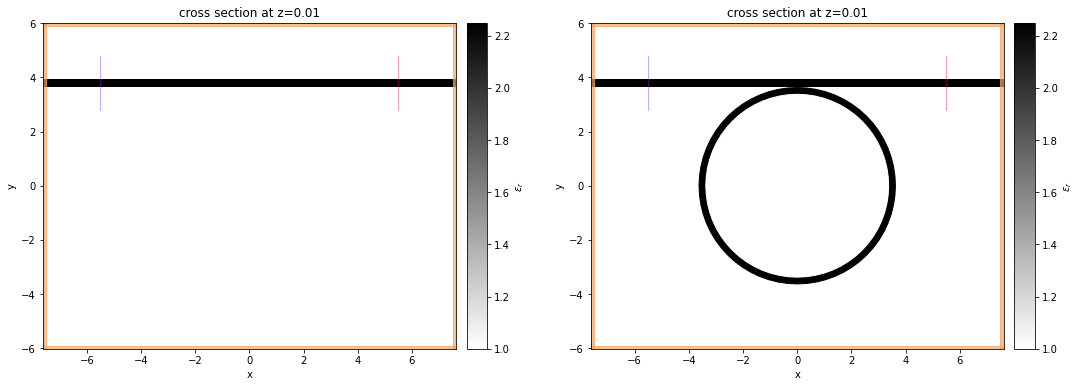

In [11]:
# plot the two simulations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
sim0.plot_eps(z=0.01, ax=ax1)
sim.plot_eps(z=0.01, ax=ax2)
plt.show()

----
## Run Simulation
Run simulations on our server. [(docs)](https://simulation.cloud/docs/html/api.html#web-api)

In [12]:
# use function above to run simulation with and without ring
sim_data0 = web.run(sim0, task_name='normalization', path='data/simulation_data0.hdf5')
sim_data = web.run(sim, task_name='with_ring', path='data/simulation_data.hdf5')

[13:19:19] INFO     Uploaded task 'normalization' with task_id                   ]8;id=130907;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:84
                    'a5d9a738-b6d1-4d6e-9857-f2571921a377'.

Output()

[13:19:21] status = queued                                                      ]8;id=475051;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:176

[13:19:31] status = preprocess                                                  ]8;id=540139;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:176

[13:19:52] status = running                                                     ]8;id=724547;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:176

[13:20:06] status = postprocess                                                 ]8;id=411337;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:176

[13:20:53] status = visualize                                                   ]8;id=233065;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:176

[13:20:57] status = success                                                     ]8;id=614223;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:176

[13:20:58] INFO     downloading file "simulation.json" to                       ]8;id=971366;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:393
                    "data/simulation.json"

Output()

           INFO     downloading file "monitor_data.hdf5" to                     ]8;id=187651;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:393
                    "data/monitor_data.hdf5"

Output()

[13:21:05] INFO     downloading file "tidy3d.log" to "data/tidy3d.log"          ]8;id=847837;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:393

Output()

[13:21:06] INFO     exporting SimulationData to data/simulation_data0.hdf5      ]8;id=214587;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:266

           INFO     loading SimulationData from data/simulation_data0.hdf5      ]8;id=105295;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:302

[13:21:07] INFO     Uploaded task 'with_ring' with task_id                       ]8;id=839000;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:84
                    '337aeeef-c289-4b83-b3e5-3a5baf10f877'.

Output()

[13:21:08] status = queued                                                      ]8;id=148264;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:176

[13:21:20] status = preprocess                                                  ]8;id=374371;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:176

           status = running                                                     ]8;id=111809;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:176

[13:22:08] status = postprocess                                                 ]8;id=110677;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:176

[13:22:56] status = visualize                                                   ]8;id=648956;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:176

[13:23:00] status = success                                                     ]8;id=735079;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:176

[13:23:01] INFO     downloading file "simulation.json" to                       ]8;id=571803;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:393
                    "data/simulation.json"

Output()

           INFO     downloading file "monitor_data.hdf5" to                     ]8;id=372253;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:393
                    "data/monitor_data.hdf5"

Output()

[13:23:09] INFO     downloading file "tidy3d.log" to "data/tidy3d.log"          ]8;id=950466;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:393

Output()

[13:23:10] INFO     exporting SimulationData to data/simulation_data.hdf5       ]8;id=795537;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:266

           INFO     loading SimulationData from data/simulation_data.hdf5       ]8;id=530754;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:302

In [13]:
print(sim_data.log)

Simulation domain Nx, Ny, Nz: [1524, 1204, 1]
Applied symmetries: [0, 0, 0]
Number of computational grid points: 1.8349e+06.
Using subpixel averaging: True
Number of time steps: 288476
Automatic shutoff factor: 1.00e-05
Time step (s): 1.7332e-17

Get source modes time (s):    0.1615
Get monitor modes time (s):   0.4244
Rest of setup time (s):       0.3428

Starting solver...
- Time step    919 / time 1.59e-14s (  0 % done), field decay: 1.00e+00
- Time step  11539 / time 2.00e-13s (  4 % done), field decay: 2.38e-03
- Time step  23078 / time 4.00e-13s (  8 % done), field decay: 2.39e-05
- Time step  34617 / time 6.00e-13s ( 12 % done), field decay: 4.00e-07
Field decay smaller than shutoff factor, exiting solver.

Solver time (s):              15.7828
Post-processing time (s):     2.7496



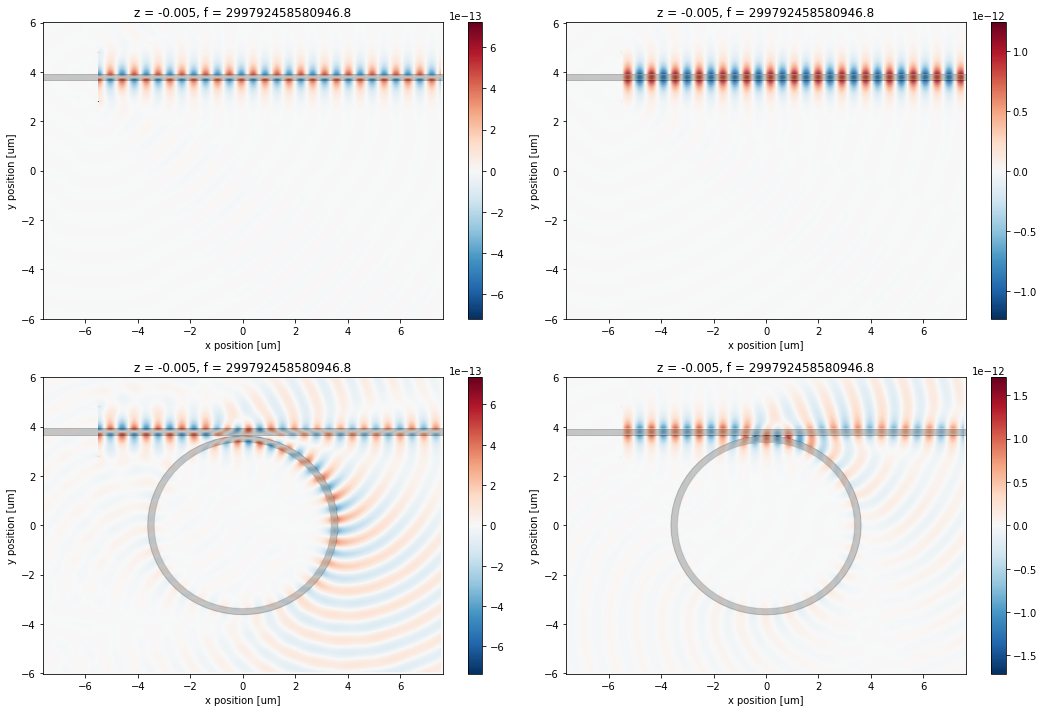

In [14]:
# visualize normalization run
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, tight_layout=True, figsize=(15, 10))
im = sim_data0.plot_field('field', 'Ex', val='real', z=0, freq=freq0, ax=ax1)
im = sim_data0.plot_field('field', 'Ey', val='real', z=0, freq=freq0, ax=ax2)
im = sim_data.plot_field('field', 'Ex', val='real', z=0, freq=freq0, ax=ax3)
im = sim_data.plot_field('field', 'Ey', val='real', z=0, freq=freq0, ax=ax4)

## Analyze Spectrum

Now let's analyze the mode amplitudes in the output waveguide.

First, let's grab the data to inspect it.

In [15]:
sim_data['mode']

<xarray.Tidy3dDataArray (direction: 2, mode_index: 2, f: 1001)>
array([[[ 9.20527218e-21-1.15400250e-20j,
 6.14102764e-21-1.15472644e-20j,
 3.49426617e-21-1.13098418e-20j, ...,
 -6.49930283e-20-1.49170352e-19j,
 -6.98809872e-20-1.44559157e-19j,
 -7.44617971e-20-1.39803540e-19j],
 [ 5.93150438e-17+7.68801143e-16j,
 1.15918246e-16+7.90369672e-16j,
 1.76715306e-16+8.06011671e-16j, ...,
 -1.71399097e-15+2.55050170e-16j,
 -1.70388851e-15+3.04552443e-16j,
 -1.69238485e-15+3.53671249e-16j]],

 [[ 3.30287920e-23-4.04420051e-23j,
 2.64281277e-23-4.48052894e-23j,
 1.88234029e-23-4.66581123e-23j, ...,
 -5.18235116e-22+3.41796769e-22j,
 -5.15199933e-22+3.60657007e-22j,
 -5.10554211e-22+3.80551221e-22j],
 [ 1.25878821e-19+4.82904526e-19j,
 1.62860463e-19+4.88336725e-19j,
 2.02368742e-19+4.90537490e-19j, ...,
 -1.86423039e-18+1.04546408e-19j,
 -1.85748390e-18+1.59976769e-19j,
 -1.85141074e-18+2.15968431e-19j]]])
Coordinates:
 * direction (direction) <U1 '+' '-'
 * mode_index (mode_index) int64 0 1
 * f (f) float64 3.747e+14 3.746e+14 ... 2.726e+14 2.725e+14
Attributes:
 units: sqrt(W)
 long_name: mode amplitudes xarray.Tidy3dDataArray direction : 2 mode_index : 2 f : 1001 (9.205272176654266e-21-1.1540024998502132e-20j) ... (-1.85141074306... array([[[ 9.20527218e-21-1.15400250e-20j,
 6.14102764e-21-1.15472644e-20j,
 3.49426617e-21-1.13098418e-20j, ...,
 -6.49930283e-20-1.49170352e-19j,
 -6.98809872e-20-1.44559157e-19j,
 -7.44617971e-20-1.39803540e-19j],
 [ 5.93150438e-17+7.68801143e-16j,
 1.15918246e-16+7.90369672e-16j,
 1.76715306e-16+8.06011671e-16j, ...,
 -1.71399097e-15+2.55050170e-16j,
 -1.70388851e-15+3.04552443e-16j,
 -1.69238485e-15+3.53671249e-16j]],

 [[ 3.30287920e-23-4.04420051e-23j,
 2.64281277e-23-4.48052894e-23j,
 1.88234029e-23-4.66581123e-23j, ...,
 -5.18235116e-22+3.41796769e-22j,
 -5.15199933e-22+3.60657007e-22j,
 -5.10554211e-22+3.80551221e-22j],
 [ 1.25878821e-19+4.82904526e-19j,
 1.62860463e-19+4.88336725e-19j,
 2.02368742e-19+4.90537490e-19j, ...,
 -1.86423039e-18+1.04546408e-19j,
 -1.85748390e-18+1.59976769e-19j,
 -1.85141074e-18+2.15968431e-19j]]]) Coordinates: (3) direction (direction) <U1 '+' '-' units : None long_name : propagation direction array(['+', '-'], dtype='<U1') mode_index (mode_index) int64 0 1 units : None long_name : mode index array([0, 1]) f (f) float64 3.747e+14 3.746e+14 ... 2.725e+14 units : Hz long_name : frequency array([3.747406e+14, 3.746001e+14, 3.744597e+14, ..., 2.726873e+14,
 2.726129e+14, 2.725386e+14]) Attributes: (2) units : sqrt(W) long_name : mode amplitudes

As we see, the mode amplitude data is complex-valued with three 3 dimensions:
* index into the mode order returned by solver (remember, we wanted mode_index=1 for fundamental TE).
* direction of the propagation (for decomposition).
* frequency.

Let's select into the first two dimensions to get mode amplitudes as a function of frequency and divide the results with a ring by the normalization.

In [16]:
mode_data = sim_data['mode'].sel(mode_index=1, direction='+')
mode_data0 = sim_data0['mode'].sel(mode_index=1, direction='+')
transmission_amps = mode_data / mode_data0

Now let's plot the data.

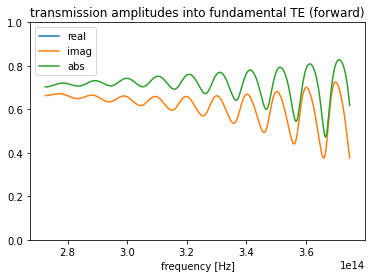

In [33]:
f, ax = plt.subplots()
transmission_amps.real.plot.line(x='f', ax=ax, label='real')
transmission_amps.imag.plot.line(x='f', ax=ax, label='imag')
abs(transmission_amps).plot.line(x='f', ax=ax, label='abs')
ax.legend()
ax.set_title('transmission amplitudes into fundamental TE (forward)')
ax.set_ylim(0, 1)
plt.show()